In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot,iplot

In [2]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('BhartiAirtel.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2582 entries, 0 to 2581
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2582 non-null   object 
 1   Open Price                 2582 non-null   float64
 2   High Price                 2582 non-null   float64
 3   Low Price                  2582 non-null   float64
 4   Close Price                2582 non-null   float64
 5   WAP                        2582 non-null   float64
 6   No.of Shares               2582 non-null   int64  
 7   No. of Trades              2582 non-null   int64  
 8   Total Turnover (Rs.)       2582 non-null   float64
 9   Deliverable Quantity       2581 non-null   float64
 10  % Deli. Qty to Traded Qty  2581 non-null   float64
 11  Spread High-Low            2582 non-null   float64
 12  Spread Close-Open          2582 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [5]:
df['Date']=pd.to_datetime(df['Date'])

In [6]:
print(f'Dataframe contains stock prices btw {df.Date.min()} to {df.Date.max()}')
print(f'Total days={(df.Date.max()- df.Date.min()).days} days')

Dataframe contains stock prices btw 2011-01-03 00:00:00 to 2021-06-04 00:00:00
Total days=3805 days


In [7]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2582.000000,2582.000000,2582.000000,2582.000000,2582.000000,2.582000e+03,2582.000000,2.582000e+03,2.581000e+03,2581.000000,2582.000000,2582.000000
mean,377.273528,382.783036,370.990840,376.645488,376.853753,7.091815e+05,6045.009682,3.120107e+08,4.165812e+05,31.093433,11.792196,-0.628040
std,75.045686,76.001058,73.684129,74.668884,74.824475,7.491105e+06,6869.653026,3.858696e+09,6.193051e+06,18.540318,6.917679,7.877328
min,240.500000,244.000000,238.500000,242.300000,240.900507,1.266500e+04,331.000000,3.896124e+06,2.970000e+03,1.270000,1.950000,-36.100000
25%,325.025000,330.000000,320.512500,324.562500,325.264876,1.571900e+05,2594.500000,5.507414e+07,3.132000e+04,17.790000,7.500000,-5.000000
50%,356.150000,361.400000,350.500000,355.450000,355.513351,2.600125e+05,4220.000000,9.375542e+07,6.415000e+04,26.560000,10.050000,-0.800000
75%,404.887500,409.125000,398.100000,403.400000,403.681500,4.642180e+05,7041.500000,1.793796e+08,1.531570e+05,39.490000,13.950000,3.300000
max,618.300000,623.000000,599.550000,608.800000,612.794431,2.795148e+08,162290.000000,1.352817e+11,1.999164e+08,99.460000,92.400000,62.200000


<Axes: >

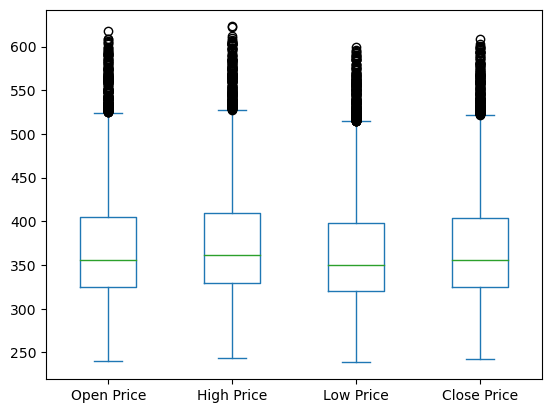

In [8]:
df[['Open Price','High Price','Low Price','Close Price']].plot(kind='box')

In [9]:
#setting the layout for our plot
layout =go.Layout(
    title='Airtel Stock Price',
    xaxis=dict( title='Date',titlefont=dict(family='Courier New,monospace',size=18,color='#7f7f7f')),
    
 yaxis=dict( title='Price',titlefont=dict(family='Courier New,monospace',size=18,color='#7f7f7f'))
)

df_data=[{'x':df['Date'],'y':df['Close Price']}]
plot= go.Figure(data=df_data,layout=layout)
iplot(plot)

Building the regression Model

In [10]:
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [11]:
#splitting data into train  and test cases

X=np.array(df.index).reshape(-1,1)
Y=df['Close Price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [12]:
#Feature scaling
scaler=StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#creating the model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [15]:
#plot actual and predicted values for train dataset

trace0=go.Scatter(x=X_train.T[0],y=Y_train,mode='markers',name='Actual Price')

trace1=go.Scatter(x=X_train.T[0],y=lm.predict(X_train).T,mode='lines',name='Predicted')

df_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=df_data,layout=layout)


In [16]:
iplot(plot2)

In [17]:
#calculate scores for model evalutaion
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.3493125808643154	4014.223475805243

